# **BERT Topic Modeling 2021**

In [1]:
import pandas as pd
import numpy as np

In [2]:
file =  r'processed_sentiment.csv'
df = pd.read_csv(file)

In [3]:
df.tail(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,useful,funny,cool,text,date,year,month,processed_text,sentiment_score,sentiment_label
42420,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.440689,-119.739681,4.0,299,...,1,0,0,Santa Barbara has lots of good pizza. \nThis o...,2018-10-18 20:35:16,2018,10,santa barbara lot good pizza one one best offe...,0.8860,positive
42421,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.440689,-119.739681,4.0,299,...,8,5,6,Solid pizza and beer at Pizza Guru. I choose ...,2018-07-22 13:31:09,2018,7,solid pizza beer pizza guru choose bbq pizza m...,0.5423,positive


In [4]:
# Filter to just 2021

# Filter the DataFrame to include only rows where 'year' is equal to 2021
df_2021 = df[df['year'] == 2021]



In [5]:
df_2021.shape

(19361, 27)

In [6]:
# # Create a new column containing the length each headline text
# df_2021["text_len"] = df_2021["processed_text"].apply(lambda x : len(x.split()))

# Convert float values to strings in 'processed_text' column
df_2021['processed_text'] = df_2021['processed_text'].astype(str)

# Create a new column containing the length of each headline text
df_2021["text_len"] = df_2021["processed_text"].apply(lambda x: len(x.split()))


<ipython-input-6-04c63c06fb27>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['processed_text'] = df_2021['processed_text'].astype(str)
<ipython-input-6-04c63c06fb27>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021["text_len"] = df_2021["processed_text"].apply(lambda x: len(x.split()))


In [7]:
df_2021.tail(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,funny,cool,text,date,year,month,processed_text,sentiment_score,sentiment_label,text_len
42381,8BUr8GviR2o_b-brO21wwQ,Kyle's Isla Vista,900 Embarcadero Del Mar,Isla Vista,CA,93117,34.412966,-119.856886,2.5,12,...,0,0,I've been eating at and supporting the SIlverg...,2021-11-19 23:29:33,2021,11,ive eating supporting silvergreens family rest...,0.8234,positive,123


In [8]:
print("The longest review length has: {} words".format(df_2021.text_len.max()))

The longest review length has: 510 words


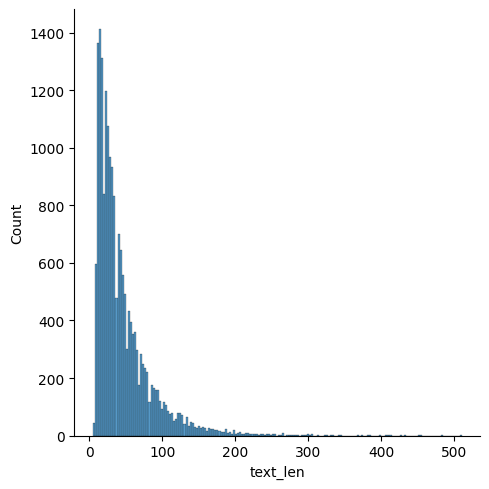

In [9]:
# Visualize the length distribution
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(df_2021.text_len, kde=False)

- **Installing/Running Bert**

In [10]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 43.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.5/149.5 kB 17.0 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.7 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039292 sha256=7a38c799e2941e283f63a59b9247455639980b0415ed5069ec37e91f92df7a72
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
  Created wheel for umap-

In [11]:
from bertopic import BERTopic
from umap import UMAP

In [12]:
# Initiate UMAP
umap_model = UMAP(n_neighbors=15,
                  n_components=5,
                  metric='cosine',
                  random_state=100)
# Initiate BERTopic
model = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True)
# Run BERTopic model
headline_topics, probabilities = model.fit_transform(df_2021.processed_text)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [13]:
freq = model.get_topic_info()
print("Number of topics: {}".format( len(freq)))
freq.head(6)

Number of topics: 103


,Topic,Count,Name,Representation,Representative_Docs
0,-1,10879,-1_food_good_place_great,"[food, good, place, great, service, time, orde...",[5 star one favorite place ton reason every si...
1,0,687,0_coffee_latte_shop_milk,"[coffee, latte, shop, milk, iced, drink, match...",[feel like neighborhood coffee shop lot really...
2,1,625,1_great_food_service_staff,"[great, food, service, staff, amazing, friendl...",[food delicious service atmosphere great defin...
3,2,560,2_pizza_crust_pepperoni_topping,"[pizza, crust, pepperoni, topping, thin, slice...",[excellent pizza ny york inspired pizza owner ...
4,3,424,3_barbara_santa_restaurant_great,"[barbara, santa, restaurant, great, food, plac...",[great local breakfast spot great service frie...
5,4,398,4_order_rude_customer_online,"[order, rude, customer, online, said, minute, ...",[horrible service dont recommend place could r...


- **Visualizations**

In [14]:
model.visualize_barchart(top_n_topics=6)

In [15]:
# Intertropic distance (showing for each topic the corresponding words and their score)

#embed c-TF-IDF representation of the topics in 2D using UMAP and then visualize the two dimensions
model.visualize_topics(top_n_topics=6)

In [16]:
# Topic Hierarchy (All these information can help the user better understand the reason why the topics have been considered to be similar one to another)

#show all hierarchy
#model.visualize_hierarchy()

#show top 6 topics
model.visualize_hierarchy(top_n_topics=6)

In [17]:
# For Topic probabilities

print('Row numbers: '+ str(len(probabilities))+' and Topic probabilities in each Row: ' +str(len(probabilities[0])))

Row numbers: 19361 and Topic probabilities in each Row: 102


In [18]:
#show Distribution of topic probabilities in row 2
model.visualize_distribution(probabilities[1],0.0002) #min_probability=0.0002

In [19]:
#Transfer to time format
df_2021['combined_date'] = df_2021['year'].astype(str) + '-' + df_2021['month'].astype(str)

df_2021 = df_2021.reset_index()

#Create topics over time
topics_over_time = model.topics_over_time(df_2021.processed_text, timestamps=df_2021.combined_date, nr_bins=20)

In [20]:
model.visualize_topics_over_time(topics_over_time, topics = [0, 1, 2, 3, 4, 5])

In [21]:
# Visualize topic frequencies for 1 star and 5 star review classes

docs=df_2021['processed_text']
classes=df_2021['sentiment_label']

#Create topics per class
topics_per_class = model.topics_per_class(docs, classes=classes)

model.visualize_topics_per_class(topics_per_class)

In [22]:
df_2021.dtypes

index                int64
business_id         object
name                object
address             object
city                object
state               object
postal_code          int64
latitude           float64
longitude          float64
stars_x            float64
review_count         int64
is_open              int64
attributes          object
categories          object
hours               object
review_id           object
user_id             object
stars_y              int64
useful               int64
funny                int64
cool                 int64
text                object
date                object
year                 int64
month                int64
processed_text      object
sentiment_score    float64
sentiment_label     object
text_len             int64
combined_date       object
dtype: object

In [23]:
# Summary statistics
print(df_2021.describe())

              index   postal_code      latitude     longitude       stars_x  \
count  19361.000000  19361.000000  19361.000000  19361.000000  19361.000000   
mean   21686.210268  93100.295181     34.422018   -119.710441      4.098006   
std    12203.256288     54.225240      0.080725      0.074802      0.510114   
min       50.000000  93013.000000     34.393343   -120.083748      1.500000   
25%    11752.000000  93101.000000     34.413456   -119.725035      4.000000   
50%    21685.000000  93101.000000     34.420108   -119.698191      4.000000   
75%    32074.000000  93108.000000     34.426530   -119.689592      4.500000   
max    42381.000000  96161.000000     39.382812   -119.511501      5.000000   

       review_count       is_open       stars_y        useful         funny  \
count  19361.000000  19361.000000  19361.000000  19361.000000  19361.000000   
mean     586.394504      0.979082      4.031248      1.165642      0.436083   
std      699.286087      0.143115      1.406267    